In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

In [3]:
# Load data
data = np.load("../data/toy_data.npz")
x = data["x"]
y = data["y"]
xt = data["xt"]
yt = data["yt"]

In [5]:
model = LinearRegression()
model.fit(x, y)
yp = model.predict(x)
ypt = model.predict(xt)
mse_train = MSE(y, yp)
mse_test = MSE(yt, ypt)

In [6]:
print(mse_train)
print(mse_test)

0.1563696973691724
0.1463252071784332


I define a convenient function to compute the MSE given the train and validation data, and the degree of polynomial feature.

In [4]:
def compute_MSE(degree, x, y, xt, yt):
    #model = Pipeline([
    #("poly", PolynomialFeatures(degree)),
    #('lin', LinearRegression())])
    model = LinearRegression()
    model.fit(x, y)
    mse_train = MSE(y, model.predict(x))
    mse_test = MSE(yt, model.predict(xt))
    return (mse_train, mse_test)

In [ ]:
mse_train, mse_test = [], []
for degree in range(20):
    mses = compute_MSE(degree, x,y,xt,yt)
    mse_train.append(mses[0])
    mse_test.append(mses[1])
plt.plot(range(20), mse_train)
plt.plot(range(20), mse_test)
plt.xlim([0, 20])
plt.ylim([0,0.4])
plt.grid("on")
plt.legend(["MSE Train", "MSE Test"])

From the curves, the optimal degree, i.e., the degree for wich the MSE is minimal on the test set, is 10. We can fit it with the best degree.

In [ ]:
# Init model
degree = 10
model = Pipeline([
    ("poly", PolynomialFeatures(degree)),
    ('lin', LinearRegression())])
# Fit
model.fit(x, y)
# MSE sur les données d'entrainement
print(f"MSE sur train: {MSE(y, model.predict(x))}")
# MSE sur les données de test
print(f"MSE sur test: {MSE(yt, model.predict(xt))}")

We can now plot the function for all the input variables, here, all values between -5 and 5.

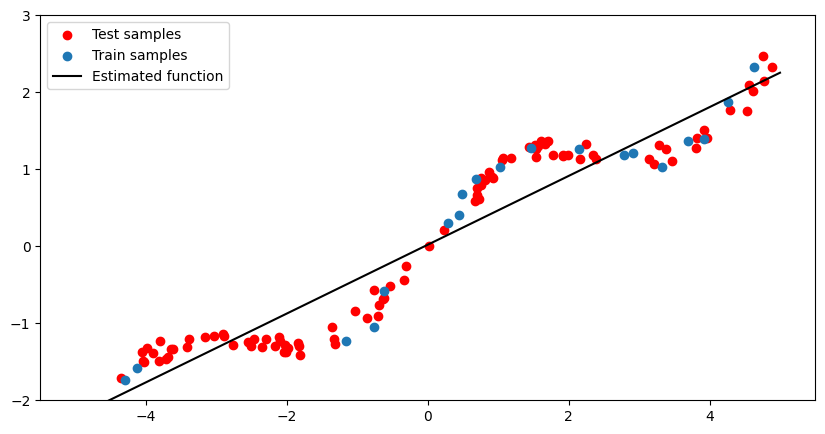

In [7]:
t = np.linspace(5,-5).reshape(-1, 1)
plt.figure(figsize=(10, 5))
plt.scatter(xt, yt,c='r')
plt.scatter(x, y)
plt.plot(t, model.predict(t),"k")
plt.ylim([-2,3])
plt.legend(["Test samples", "Train samples", "Estimated function"])

Another interesting plot in regression is the scatter plot (https://en.wikipedia.org/wiki/Scatter_plot). It plots the predicted value against the real value from the train/test set. If the prediction is perfect, you should get a straight line ($y_{pred} = y_{true}$), otherwise you can see for wich value you have over/under-estimation. For these toy data, we are closed to the line, which is consistent with the estimated MSE.

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(t, t, 'k')
plt.scatter(yt, model.predict(xt),color="r")
plt.scatter(y, model.predict(x),color="b")
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.grid("on")